# Optimizing College Campus Canvassing: Dorm-Storming

This report analyzes door-knocking response rates to optimize Rally NC’s ‘dorm-storming’ efforts at the University of North Carolina at Chapel Hill. Using data from the first week of dorm-storming, each dorm was assigned a ‘fruitfulness’ score to prioritize the most responsive ones before election day 2024.

#### Objective
Identify dorms with the highest response rates to optimize canvassing efforts, with recommendations based on an analysis of dorm engagement data.

#### Limitations
This analysis focuses on overall dorm engagement due to limited data on specific floors and time intervals.


## Data Loading and Cleaning

Load and clean the dataset, filtering out rows without sufficient data. This includes handling missing or zero values in key columns and converting percentage data to a usable format.


In [ ]:
import pandas as pd

# Load data
data = pd.read_csv('UNC Dorm Contact Rate - Sheet2 (1).csv')

# Filter out rows where data might be insufficient
data = data.dropna(subset=['# of rooms (not including bathrooms/telecoms)'])
data = data[data['# of rooms (not including bathrooms/telecoms)'] != 0]

# Filter out rows where the second-to-last character in 'F = Floor' is 'F'
data = data[data['F = Floor'].str[-2] != 'F']
data['Average % of doors answered'] = data['Average % of doors answered'].str.rstrip('%').astype(float) / 100

,F = Floor,# of rooms (not including bathrooms/telecoms),# of doors answered from 11-12,% of total,# of doors answered from 12-1,% of total.1,# of doors answered from 1-2,% of total.2,# of doors answered from 2-3,% of total.3,...,% of total.4,# of doors answered from 4-5,% of total.5,# of doors answered from 5-6,% of total.6,# of doors answered from 6-7,% of total.7,Average doors answersed,Average % of doors answered,Fruitfulness Score
113,Morrison,216.0,0.0,0.00%,0.0,0.00%,0.0,0.00%,23.0,10.65%,...,0.00%,0.0,0.00%,0.0,0.00%,0.0,0.00%,23.0,0.1065,54.73195
62,Hardin,112.0,0.0,0.00%,0.0,0.00%,0.0,0.00%,0.0,0.00%,...,0.00%,0.0,0.00%,46.0,41.07%,0.0,0.00%,46.0,0.4107,45.52321
10,Carmichael,173.0,0.0,0.00%,0.0,0.00%,0.0,0.00%,0.0,0.00%,...,10.40%,0.0,0.00%,0.0,0.00%,0.0,0.00%,18.0,0.1040,43.63120
92,Koury,117.0,0.0,0.00%,0.0,0.00%,0.0,0.00%,0.0,0.00%,...,29.91%,0.0,0.00%,0.0,0.00%,0.0,0.00%,35.0,0.2991,40.98973
187,Union Apartments,204.0,0.0,0.00%,0.0,0.00%,0.0,0.00%,0.0,0.00%,...,0.00%,0.0,0.00%,0.0,0.00%,0.0,0.00%,0.0,0.0000,40.80000
73,Hinton James,101.0,0.0,0.00%,0.0,0.00%,0.0,0.00%,0.0,0.00%,...,7.92%,0.0,0.00%,27.0,26.73%,0.0,0.00%,35.0,0.3465,37.80395
15,Cobb,160.0,0.0,0.00%,0.0,0.00%,0.0,0.00%,0.0,0.00%,...,3.13%,0.0,0.00%,0.0,0.00%,0.0,0.00%,5.0,0.0313,34.50939
39,Craige North,97.0,0.0,0.00%,0.0,0.00%,0.0,0.00%,0.0,0.00%,...,0.00%,0.0,0.00%,0.0,0.00%,27.0,27.84%,27.0,0.2784,32.98352
147,Shortbread,90.0,0.0,0.00%,0.0,0.00%,0.0,0.00%,0.0,0.00%,...,15.56%,0.0,0.00%,0.0,0.00%,0.0,0.00%,14.0,0.1556,25.04668
30,Craige,68.0,0.0,0.00%,0.0,0.00%,19.0,27.94%,0.0,0.00%,...,0.00%,0.0,0.00%,3.0,4.41%,0.0,0.00%,22.0,0.3235,24.69705


## Calculating Fruitfulness Score

Assign a weighted 'Fruitfulness Score' to each dorm to measure overall engagement, using a formula that emphasizes response rates and number of doors. The weights used are:
- Average number of doors answered: 50%
- Average percentage of doors answered: 30%
- Total number of rooms: 20%


In [ ]:
#Assigning values to fruiftulness score
s1, s2, s3 = .5,.3,.2
data['Fruitfulness Score'] = ( data['# of rooms (not including bathrooms/telecoms)'] * s3 +
                             data['Average doors answersed'] * s1 +
                            data['Average % of doors answered'] * s2)

#Table ranked by fruitfulness score
data = data.sort_values(by='Fruitfulness Score', ascending=False)
data

## Visualizing Top Dorms by Fruitfulness

The bar chart below displays the top 10 dorms based on their fruitfulness scores, highlighting those most suitable for high-impact canvassing.


Text(0.5, 1.0, 'Top 10 Fruitfulness Scores for UNC Dorms')

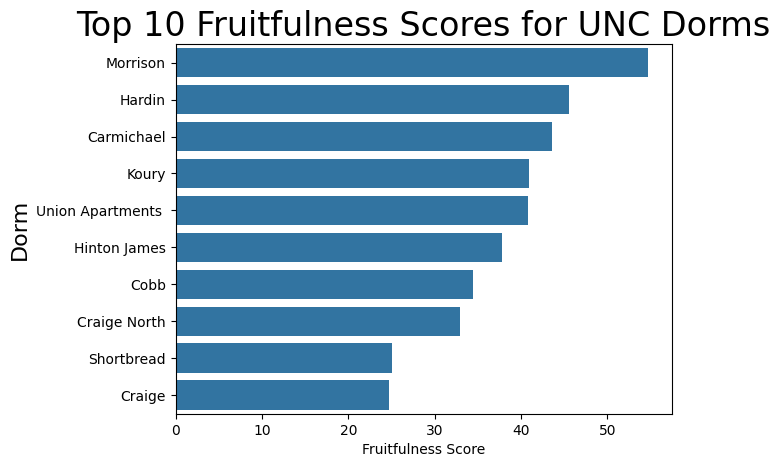

In [ ]:
import seaborn as sns
#Display a bar chart based on fruitfulness score
data_top10 = data.head(10)
bar1 = sns.barplot(data_top10, y = 'F = Floor', x = 'Fruitfulness Score')
bar1.set_ylabel('Dorm', fontsize = 16)
bar1.set_title('Top 10 Fruitfulness Scores for UNC Dorms', fontsize = 24)

## Analysis of Response Rates

In addition to the fruitfulness score, the charts below display engagement in terms of the average percentage and number of doors answered per dorm. These metrics independently showcase high-response dorms.


Text(0.5, 1.0, 'Top 10 Response Perentages for UNC Dorms')

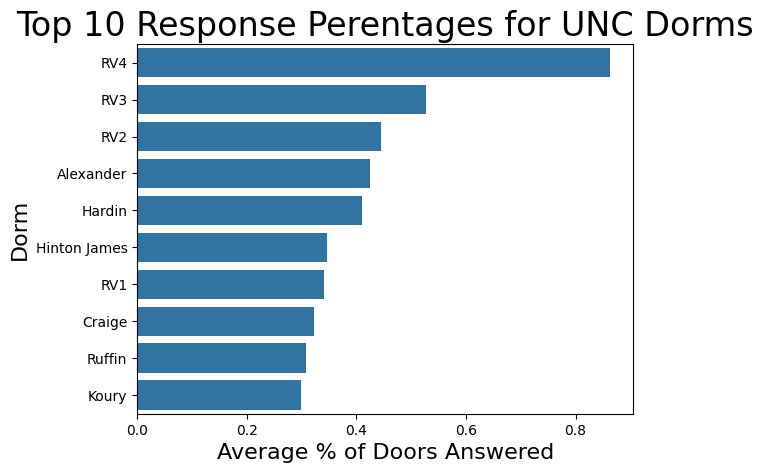

In [ ]:
#Charts based upon response percentages
data = data.sort_values(by='Average % of doors answered', ascending=False)
data2_top10 = data.head(10)
bar2 = sns.barplot(data2_top10, y = 'F = Floor', x = 'Average % of doors answered')
bar2.set_ylabel('Dorm', fontsize = 16)
bar2.set_xlabel('Average % of Doors Answered', fontsize = 16)
bar2.set_title('Top 10 Response Perentages for UNC Dorms', fontsize = 24)

Text(0.5, 1.0, 'Top 10 Average Answered Doors for UNC Dorms')

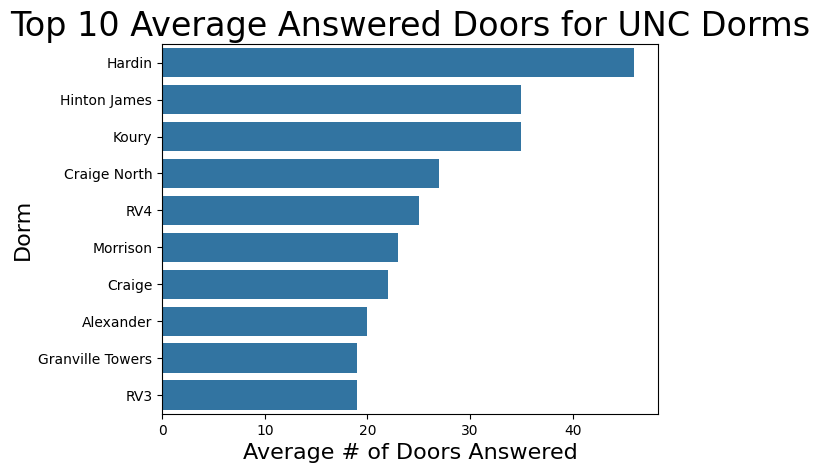

In [ ]:
data = data.sort_values(by='Average doors answersed', ascending=False)
data3_top10 = data.head(10)
bar3 = sns.barplot(data3_top10, y = 'F = Floor', x = 'Average doors answersed')
bar3.set_ylabel('Dorm', fontsize = 16)
bar3.set_xlabel('Average # of Doors Answered', fontsize = 16)
bar3.set_title('Top 10 Average Answered Doors for UNC Dorms', fontsize = 24)

## Findings

1. **Highest Engagement Dorms**: Top dorms based on fruitfulness score are Morrison, Hardin, and Carmichael.
2. **Consistent Performers**: Dorms with high performance across all metrics include Hardin, Hinton James, Koury, and Craige.
3. **Visual Insights**: The bar charts above provide visual representations of dorm engagement across different metrics.

### Recommendations
- Prioritize dorms with consistently high fruitfulness scores.
- Send additional fellows to Hardin, Morrison, and Koury due to high engagement potential.


## Limitations and Future Work

1. **Time and Floor Data**: More detailed data on the optimal times and specific floors within dorms could improve targeting.
2. **Dorm Layout**: Understanding dorm layouts (e.g., suite style) may provide insight into engagement rates.
3. **Further Testing**: Additional weeks of data collection would help verify the consistency of these findings.
